In [1]:
%load_ext autoreload
%autoreload 2


In [44]:
#

import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys


15.500496360463098
NPass Loop for 1D array took 0.0003 seconds

2.3273793943623327 -2.327379394362323


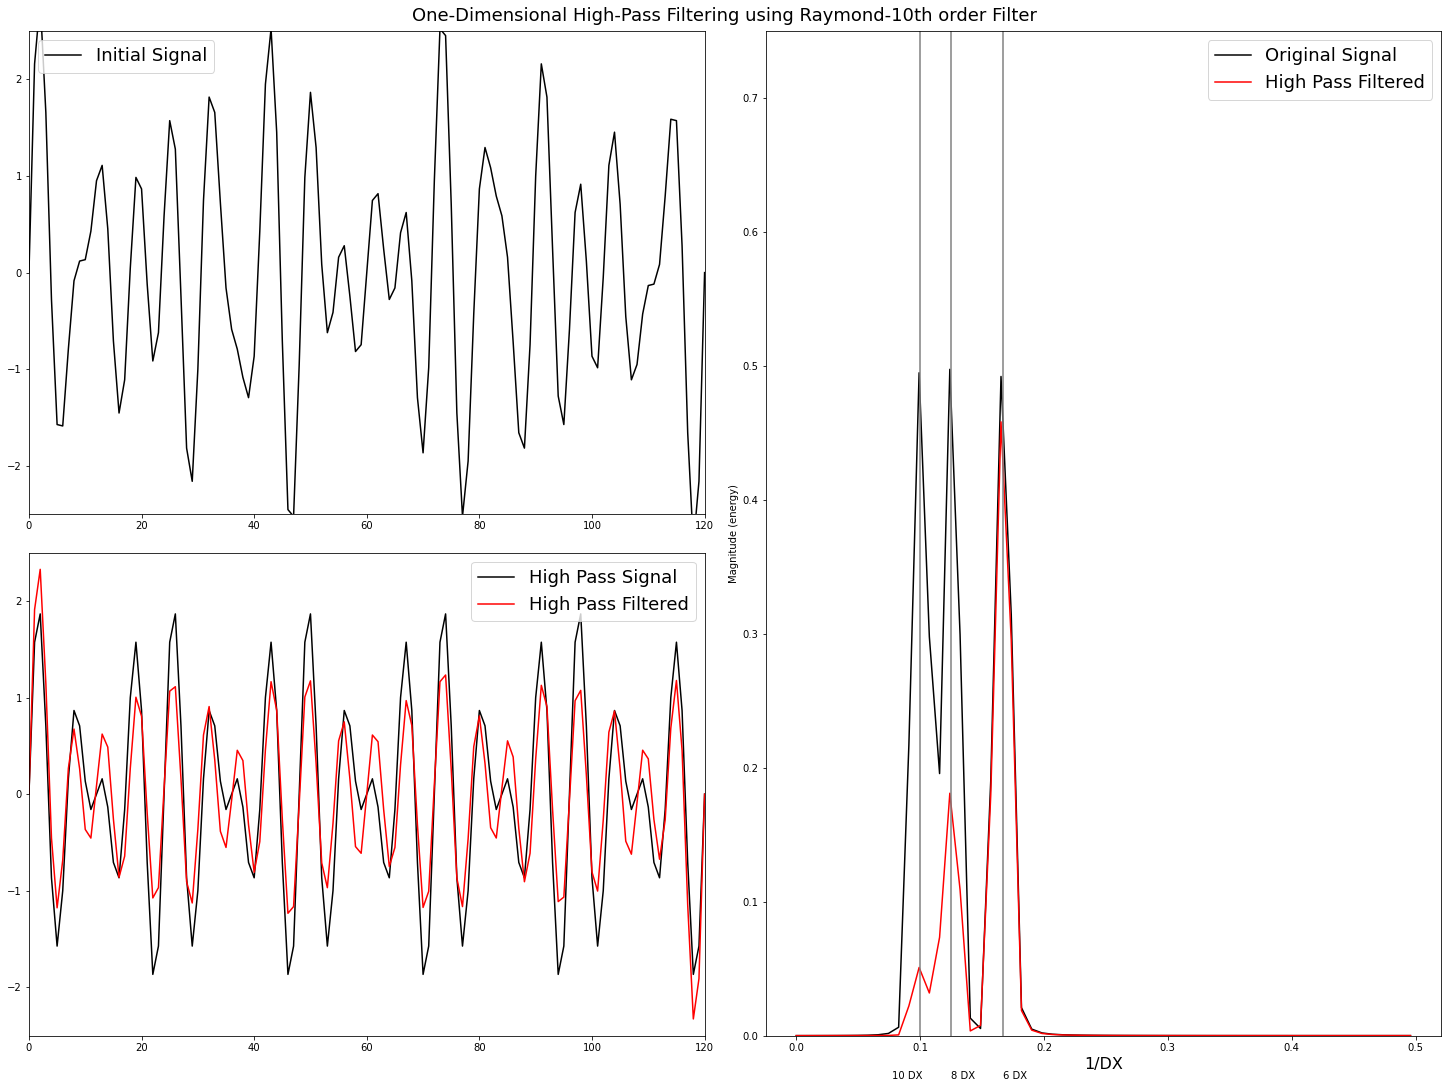

In [48]:
# Test 1D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6, RaymondFilter10, RaymondFilter6F, scale6npass10
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        AMP   DX
wave0 = [1.0,  6.0]
wave1 = [1.0,  8.0]
wave2 = [1.0, 10.0]

ylim  = [-2.5,2.5]

x     = np.arange(121)

xlim  = [0,x[-1]]

eps10 =  3000.

eps = scale6npass10(eps10)

print(eps)

npass = 6

bc_reflect = False

field0 = wave0[0]*np.sin(2.0*np.pi*x/wave0[1])
field1 = wave1[0]*np.sin(2.0*np.pi*x/wave1[1]) 
field2 = wave2[0]*np.sin(2.0*np.pi*x/wave2[1])

field = field0 + field1 + field2

ffield = field - RaymondFilter6F(field.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.plot(x, field, color='k', label='Total Signal')
ax1.legend(['Initial Signal'], fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# High pass plot

ax2.plot(x, field0+field1, color='k', label='High Pass Signal')
ax2.plot(x, ffield, color='r', label='High Pass Filtered')

print(ffield.max(), ffield.min())

ax2.set_xlim(xlim)
ax2.legend(fontsize=18)
ax2.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field, Fs=1.0, color='k', label='Original Signal')
line2 = ax3.magnitude_spectrum(ffield, Fs=1.0, color='r', label='High Pass Filtered')
ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)
ax3.plot([1.0/wave1[1],1.0/wave1[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave2[1],1.0/wave2[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave0[1],1.0/wave0[1]], [0.0, 1.0], color='grey')
ax3.text(1.0/wave2[1]-0.01, -0.03, "%d DX" % (int(wave2[1])), va="center", ha="center")
ax3.text(1.0/wave1[1]+0.01, -0.03, "%d DX" % (int(wave1[1])), va="center", ha="center")
ax3.text(1.0/wave0[1]+0.01, -0.03, "%d DX" % (int(wave0[1])), va="center", ha="center")
ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond-10th order Filter", fontsize=18)
plt.show()



48.572235823707686
NPass Loop for 2D array took 0.0346 seconds



copied an array: size=90601, elsize=8
copied an array: size=90601, elsize=8
copied an array: size=90601, elsize=8
copied an array: size=90601, elsize=8
copied an array: size=90601, elsize=8


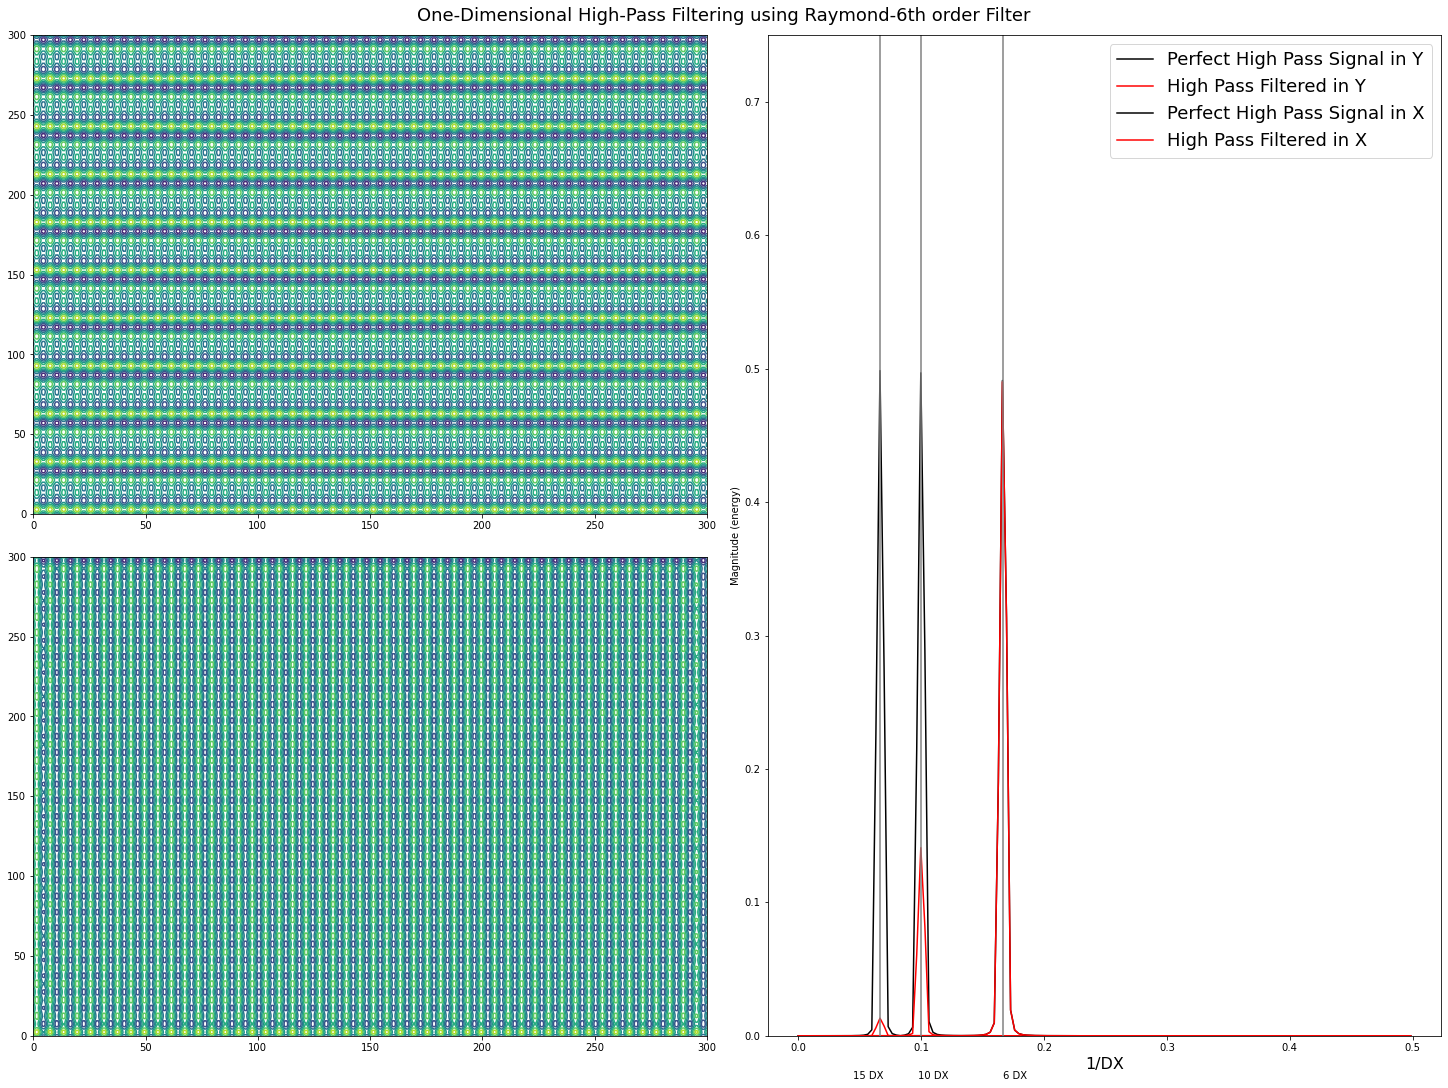

In [87]:
# Test 2D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6F, scale6npass10
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        AMP   DX
wave0 = [1.0,  6.0]
wave1 = [1.0,  10.0]
wave2 = [1.0,  15.0]

ylim  = [-2.5,2.5]

nx = 301

x     = np.arange(nx)

xlim  = [0,x[-1]]

eps10 =  20000.

eps = scale6npass10(eps10)

print(eps)

npass = 6

bc_reflect = False

field0 = wave0[0]*np.sin(2.0*np.pi*x/wave0[1])
field1 = wave1[0]*np.sin(2.0*np.pi*x/wave1[1]) 
field2 = wave2[0]*np.sin(2.0*np.pi*x/wave2[1])

field2d = np.zeros((nx,nx))

for i in np.arange(nx):
    for j in np.arange(nx):

        field2d[j,i] = field0[i] + field1[j] + field2[j]

ffield = field2d - RaymondFilter6F(field2d.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.contour(x, x, field2d)
#ax1.title('Initial Signal', fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(xlim)

ax2.contour(x, x, ffield)
#ax2.title('Final Signal', fontsize=18)
ax2.set_xlim(xlim)
ax2.set_ylim(xlim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field2d[:,60].flatten(), Fs=1.0, color='k', label='Perfect High Pass Signal in Y')
line2 = ax3.magnitude_spectrum(ffield[:,60].flatten(), Fs=1.0, color='r', label='High Pass Filtered in Y')
line1 = ax3.magnitude_spectrum(field2d[60,:].flatten(), Fs=1.0, color='k', label='Perfect High Pass Signal in X')
line2 = ax3.magnitude_spectrum(ffield[60,:].flatten(), Fs=1.0, color='r', label='High Pass Filtered in X')


ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)

ax3.plot([1.0/wave1[1],1.0/wave1[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave2[1],1.0/wave2[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave0[1],1.0/wave0[1]], [0.0, 1.0], color='grey')
ax3.text(1.0/wave2[1]-0.01, -0.03, "%d DX" % (int(wave2[1])), va="center", ha="center")
ax3.text(1.0/wave1[1]+0.01, -0.03, "%d DX" % (int(wave1[1])), va="center", ha="center")
ax3.text(1.0/wave0[1]+0.01, -0.03, "%d DX" % (int(wave0[1])), va="center", ha="center")
ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond-6th order Filter", fontsize=18)
plt.show()
